# 10. MACHINE LEARNING EXPLAINABILITY

# 10.2. PERMUTATION IMPORTANCE

# 10.2.1. COURS

In [3]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_10-MACHINE_LEARNING_EXPLAINABILITY')

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv('fifa-2018-match-statistics/input/fifa-2018.csv')

In [6]:
# TARGET
# Convert from string "Yes"/"No" to binary
y = (data['Man of the Match'] == "Yes")  

In [7]:
# FEATURES
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

In [9]:
# DECOUPE DU JEU DE DONNEES EN TRAIN SET ET TEST SET
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [10]:
# entrainement du modèle RandomForestClassifier
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [12]:
# calculer l'importance des features avec librairie eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

C:\Users\Outils\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Outils\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


In [14]:
# Interprétation des importances de la permutation
# Les valeurs vers le haut sont les plus importantes, et celles vers le bas
# importent le moins.
# Le premier chiffre de chaque rangée indique dans quelle mesure la performance
# du modèle a diminué avec un brassage aléatoire (dans ce cas, en utilisant 
# la "précision" comme mesure de la performance).

# Comme dans la plupart des domaines de la science des données, le changement
# de performance exact d'une colonne est aléatoire. Nous mesurons le degré 
# d'aléa dans notre calcul de l'importance de la permutation en répétant le 
# processus avec plusieurs brassages. 
# Le nombre qui suit le ± mesure la variation des performances d'un brassage à 
# l'autre.

# Vous verrez parfois des valeurs négatives pour les importances de permutation.
# Dans ce cas, les prédictions sur les données mélangées (ou bruitées) se sont 
# avérées plus précises que les données réelles. Cela se produit lorsque la 
# caractéristique n'avait pas d'importance (elle aurait dû avoir une importance 
# proche de 0), mais que le hasard a fait que les prédictions sur les données 
# mélangées étaient plus précises. Cette situation est plus courante avec les 
# petits ensembles de données, comme celui de cet exemple, car il y a plus de
# place pour la chance/le hasard.

# Dans notre exemple, la caractéristique la plus importante est le nombre de 
# buts marqués. Cela semble raisonnable. Les fans de football peuvent avoir 
# une certaine intuition quant à savoir si l'ordre des autres variables est 
# surprenant ou non.

# 10.2.2. EXERCICES

In [36]:
# Loading data, dividing, modeling and EDA below
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv('new-york-city-taxi-fare-prediction/input/train.csv', nrows=50000)

In [38]:
# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

In [39]:
y = data.fare_amount
print(y.shape)
y

(31289,)


2         5.7
3         7.7
4         5.3
6         7.5
7        16.5
         ... 
49993     7.3
49994     8.5
49996     7.5
49998     4.5
49999    10.9
Name: fare_amount, Length: 31289, dtype: float64

In [40]:
base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count']

X = data[base_features]
print(X.shape)
X

(31289, 5)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
6,-73.980002,40.751662,-73.973802,40.764842,1
7,-73.951300,40.774138,-73.990095,40.751048,1
...,...,...,...,...,...
49993,-73.982363,40.765060,-73.969167,40.761268,1
49994,-73.976212,40.744832,-73.981567,40.724635,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49998,-73.946062,40.777567,-73.953450,40.779687,2


In [41]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [42]:
first_model = RandomForestRegressor(n_estimators=30, random_state=1)
first_model.fit(train_X, train_y)

RandomForestRegressor(n_estimators=30, random_state=1)

In [43]:
# show data
print("Data sample:")
data.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [44]:
train_X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000
mean,-73.976827,40.756931,-73.975359,40.757434,1.662320
std,0.014625,0.018206,0.015930,0.018659,1.290729
min,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,-73.987964,40.744901,-73.987143,40.745756,1.000000
50%,-73.979629,40.758076,-73.978588,40.758542,1.000000
75%,-73.967797,40.769602,-73.966459,40.770406,2.000000
max,-73.900062,40.799952,-73.900062,40.799999,6.000000


In [45]:
train_y.describe()

count    23466.000000
mean         8.472539
std          4.609747
min          0.010000
25%          5.500000
50%          7.500000
75%         10.100000
max        165.000000
Name: fare_amount, dtype: float64

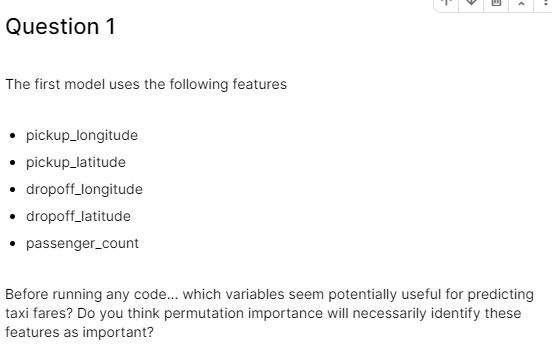

In [ ]:
# Solution : Il serait utile de savoir si les taxis de la ville de New York 
# font varier les prix en fonction du nombre de passagers qu'ils ont. 
# La plupart des endroits ne changent pas les tarifs en fonction du nombre de 
# passagers. Si vous supposez que la ville de New York est la même, seules les 
# quatre caractéristiques les plus importantes devraient compter. 
# À première vue, il semble que toutes ces caractéristiques devraient avoir la 
# même importance.

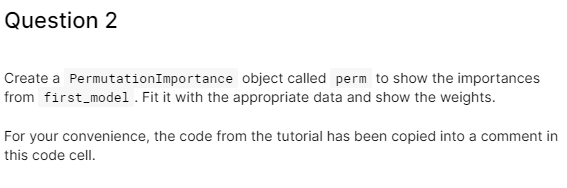

In [46]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)

In [47]:
# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = val_X.columns.tolist())
# eli5.show_weights(perm, feature_names = base_features)

Weight,Feature
0.8496 ± 0.0178,dropoff_latitude
0.8173 ± 0.0263,pickup_latitude
0.6186 ± 0.0617,pickup_longitude
0.5525 ± 0.0279,dropoff_longitude
-0.0026 ± 0.0019,passenger_count


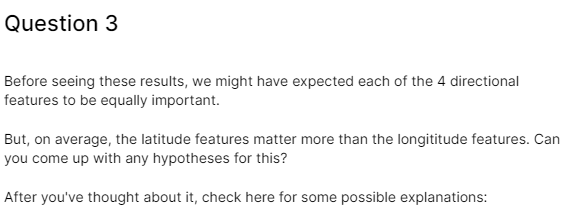

In [ ]:
# 1. Les voyages peuvent avoir tendance à avoir des distances en latitude plus 
# grandes que les distances en longitude. Si les valeurs des longitudes étaient 
# généralement plus proches, les mélanger n'aurait pas autant d'importance.
# 2. Différentes parties de la ville pourraient avoir des règles de tarification
# différentes (par exemple, le prix par kilomètre), et les règles de 
# tarification pourraient varier davantage en fonction de la latitude que de la 
# longitude.
# 3. Les péages pourraient être plus élevés sur les routes allant vers le nord <-> sud (changement de latitude) que sur les routes allant vers l'est <-> ouest (changement de longitude).  La latitude aurait donc un effet plus important sur la prévision car elle saisit le montant des péages.

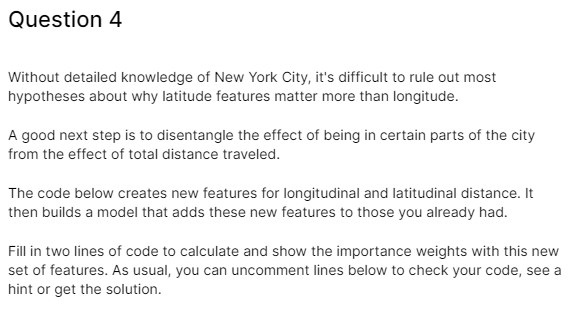

In [48]:
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]

In [49]:
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, 
                                                                  random_state=1)

In [50]:
second_model = RandomForestRegressor(n_estimators=30, random_state=1)
second_model.fit(new_train_X, new_train_y)

RandomForestRegressor(n_estimators=30, random_state=1)

In [51]:
# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
# Use a random_state of 1 for reproducible results that match the expected solution.
perm2 =  PermutationImportance(second_model, random_state=8).fit(new_val_X, 
                                                                 new_val_y)

In [52]:
# show the weights for the permutation importance you just calculated
eli5.show_weights(perm2, feature_names = new_val_X.columns.tolist())
# eli5.show_weights(perm2, feature_names = features_2)

Weight,Feature
0.5706 ± 0.0281,abs_lat_change
0.4490 ± 0.0591,abs_lon_change
0.0813 ± 0.0211,pickup_latitude
0.0757 ± 0.0151,dropoff_latitude
0.0671 ± 0.0093,dropoff_longitude
0.0642 ± 0.0170,pickup_longitude


In [ ]:
# Comment interpréteriez-vous ces notes d'importance ? La distance parcourue 
# semble bien plus importante que les effets de localisation.

# Mais le lieu affecte toujours les prédictions du modèle, et le lieu de chute
# a maintenant un peu plus d'importance que le lieu de ramassage. 
# Avez-vous des hypothèses sur les raisons de cette situation ? 
# Les techniques des prochaines leçons vous aideront à vous plonger davantage 
# dans cette question.